In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

raw_city = pd.read_csv(city_data_to_load)
raw_ride = pd.read_csv(ride_data_to_load)

In [2]:
#Examine City Data
raw_city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#Examine Rides Data
raw_ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#Merged Dataset
city_rides = pd.merge(raw_city, raw_ride, on="city", how = 'left')
city_rides
city_rides.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#Build out our three data frames based on city type
urban_df = city_rides.loc[city_rides["type"] == "Urban"]
sub_df = city_rides.loc[city_rides["type"] == "Suburban"]
rural_df = city_rides.loc[city_rides["type"] == "Rural"]

In [6]:
# group by city names within each dataframe to get the county and average by city
urban_group = urban_df.groupby(["city"])
sub_group = sub_df.groupby(["city"])
rural_group = rural_df.groupby(["city"])

In [7]:
#Number of Rides per city by city type group
urban_rides = urban_group['ride_id'].count()
sub_rides = sub_group['ride_id'].count()
rural_rides = rural_group['ride_id'].count()

In [8]:
#Average Fare per ride per city by city type group
urban_fare = urban_group['fare'].mean()
sub_fare = sub_group['fare'].mean()
rural_fare = rural_group['fare'].mean()

In [9]:
#Number of drivers per city by city type group
urban_drive = urban_group['driver_count'].mean()
sub_drive = sub_group['driver_count'].mean()
rural_drive = rural_group['driver_count'].mean()

In [10]:
#Need to scale the count of drivers to improve the visualization
urban_scaler = urban_drive*10
sub_scaler = sub_drive*10
rural_scaler = rural_drive*10

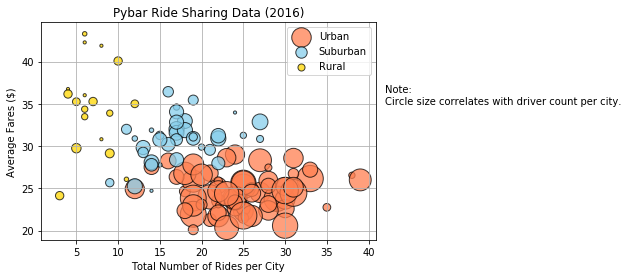

In [11]:
# Tells matplotlib that we want to make a scatter plot
plt.scatter(urban_rides, urban_fare, marker="o", facecolors="Coral", edgecolors="black", 
                     s=urban_scaler, alpha=0.75, label="Urban")
plt.scatter(sub_rides, sub_fare, marker="o", facecolors="SkyBlue", edgecolors="black", 
                       s=sub_scaler, alpha=0.75, label="Suburban")
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="Gold", edgecolors="black", 
                    s=rural_scaler, alpha=0.75, label="Rural")

# Create a legend for our chart
#plt.legend(label)
plt.legend(loc="upper right")

#Lables, Title & Grid
plt.title("Pybar Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fares ($)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.grid(True)

# Save Scatter Chart
plt.savefig("../Images/Rides_Fares_scatter.png", bbox_inches="tight")

In [12]:
#total fares by city type calculations for pie charts
fares_type = city_rides.groupby(["type"])
total_fares = fares_type['fare'].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#total fares by city type calculations for pie charts
total_rides = fares_type["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
#total drivers by city type calculations for pie charts
city_type_drives = raw_city.groupby(["type"])
total_drivers = city_type_drives['driver_count'].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
#review zipping, matplot is able to line up humans with 220 with red... it 'zips' the lists together
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
#total_sizes = 

# The colors of each section of the pie chart
colors = ["gold","lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
# notice this is a tuple instead of a list
explode = (0, 0, 0.15)

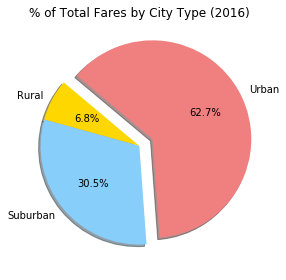

In [16]:
plt.pie(total_fares, labels=labels, colors=colors, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type (2016)")
plt.tight_layout()

# Save Pie Chart
plt.savefig("../Images/Total_Fares_pie.png", bbox_inches="tight")

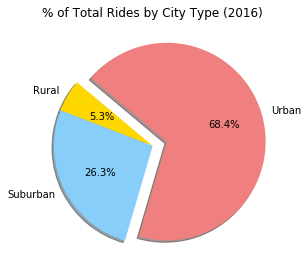

In [17]:
plt.pie(total_rides, labels=labels, colors=colors, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type (2016)")
plt.tight_layout()

# Save Pie Chart
plt.savefig("../Images/Total_Rides_pie.png", bbox_inches="tight")

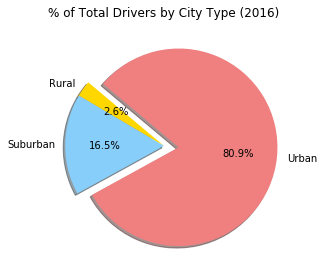

In [18]:
plt.pie(total_drivers, labels=labels, colors=colors, 
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type (2016)")
plt.tight_layout()

# Save Pie Chart
plt.savefig("../Images/Total_Drivers_pie.png", bbox_inches="tight")